In [12]:
import numpy as np
from numpy import sin, cos, sqrt, arctan, pi, exp
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import csv
import os
from qutip import *
from tomo import *

In [13]:
np.eye(3, dtype=complex)

array([[1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j]])

In [61]:
def mat2to3(mat2,idx):
    i,j = idx
    mat3 = np.eye(3, dtype=complex)
    mat3[i,i] = mat2[0,0]
    mat3[i,j] = mat2[0,1]
    mat3[j,i] = mat2[1,0]
    mat3[j,j] = mat2[1,1]
    return mat3

In [62]:
mat2to3(Xpi2,[1,2])

array([[1.        +0.j        , 0.        +0.j        ,
        0.        +0.j        ],
       [0.        +0.j        , 0.70710678+0.j        ,
        0.        -0.70710678j],
       [0.        +0.j        , 0.        -0.70710678j,
        0.70710678+0.j        ]])

In [63]:
mat2to3(tomo_ops[1],[0,1])

array([[0.70710678+0.j        , 0.        -0.70710678j,
        0.        +0.j        ],
       [0.        -0.70710678j, 0.70710678+0.j        ,
        0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        1.        +0.j        ]])

In [65]:
np.dot(mat2to3(tomo_ops[1],[1,2]) , mat2to3(tomo_ops[1],[0,1]))

array([[ 0.70710678+0.j        ,  0.        -0.70710678j,
         0.        +0.j        ],
       [ 0.        -0.5j       ,  0.5       +0.j        ,
         0.        -0.70710678j],
       [-0.5       +0.j        ,  0.        -0.5j       ,
         0.70710678+0.j        ]])

In [102]:
ops_qutrit = []
# idxs = [[0,1],[1,2],[0,2]]

for op in tomo_ops:
    for op in tomo_ops:
        ops_qutrit += [np.dot( mat2to3(op,[1,2]),mat2to3(op,[0,1]) ) ]
        
ops_qutritN = ops_qutrit[0:7] + [ops_qutrit[8]]

In [104]:
init_qst(ops_qutritN, key='tomo_qutrit')

array([[ 1.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         1.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         1.        +0.j        ],
       [ 0.5       +0.j        ,  0.        +0.5j       ,
         0.        +0.j        ,  0.        -0.5j       ,
         0.5       +0.j        ,  0.        -0.j        ,
         0.        +0.j     

array([[-0.01956489,  0.04176446,  0.97780043],
       [-0.01193901,  0.52353874,  0.48840027],
       [-0.02532687,  0.55222402,  0.47310286],
       [-0.02657155,  0.0829987 ,  0.94357285],
       [-0.04291791,  0.61879386,  0.42412405],
       [-0.02586084,  0.46156887,  0.56429197],
       [-0.01210847,  0.04018765,  0.97192082],
       [ 0.00137442,  0.44471786,  0.55390772],
       [-0.02346013,  0.44449168,  0.57896845]])

In [88]:
mat[0:6]

array([[-0.01956489,  0.04176446,  0.97780043],
       [-0.01193901,  0.52353874,  0.48840027],
       [-0.02532687,  0.55222402,  0.47310286],
       [-0.02657155,  0.0829987 ,  0.94357285],
       [-0.04291791,  0.61879386,  0.42412405],
       [-0.02586084,  0.46156887,  0.56429197]])

In [151]:
mat = np.loadtxt('0067msta_tomo.txt')

matN = mat[(0,1,2,3,4,5,6,8),]

In [124]:
matN,mat

(array([[-0.01956489,  0.04176446,  0.97780043],
        [-0.01193901,  0.52353874,  0.48840027],
        [-0.02532687,  0.55222402,  0.47310286],
        [-0.02657155,  0.0829987 ,  0.94357285],
        [-0.04291791,  0.61879386,  0.42412405],
        [-0.02586084,  0.46156887,  0.56429197],
        [-0.01210847,  0.04018765,  0.97192082],
        [-0.02346013,  0.44449168,  0.57896845]]),
 array([[-0.01956489,  0.04176446,  0.97780043],
        [-0.01193901,  0.52353874,  0.48840027],
        [-0.02532687,  0.55222402,  0.47310286],
        [-0.02657155,  0.0829987 ,  0.94357285],
        [-0.04291791,  0.61879386,  0.42412405],
        [-0.02586084,  0.46156887,  0.56429197],
        [-0.01210847,  0.04018765,  0.97192082],
        [ 0.00137442,  0.44471786,  0.55390772],
        [-0.02346013,  0.44449168,  0.57896845]]))

In [137]:
rho = Qobj(qst(matN, 'tomo_qutrit')) #/ rho.tr()#.unit()


# matrix_histogram(np.real(rho.full()))

# matrix_histogram(np.imag(rho.full()))
# plt.show()

(<Figure size 432x288 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x1ee3a98ea20>)

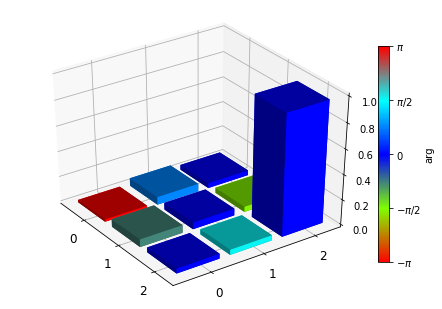

In [135]:
matrix_histogram_complex(rho)

In [148]:
def validDensityMatrix(rho,power=None):
    import scipy
    """make rho hermitian, positive semidefinite and normalize trace to 1"""
    # make matrix hermitian
    rho = 0.5 * (rho + np.transpose(np.conjugate(rho)))
    p,psi = scipy.linalg.eigh(rho)
    # make matrix positive semidefinite
    p = p * (p>0)
    print(p)
    # normalize trace
    p /= np.sum(p)
    if power == 0.5:
        p = np.sqrt(p)
    elif power is not None:
        p = p ** power
    print(p[:,None]*np.transpose(np.conjugate(psi)))
    return np.dot(psi,p[:,None]*np.transpose(np.conjugate(psi)))

[-0.         0.0871917  0.9680984]
[[ 0.        +0.j          0.        +0.j          0.        +0.j        ]
 [-0.04039558+0.j         -0.05051497-0.05118224j  0.00412555-0.00253483j]
 [-0.03865509+0.j         -0.00163826-0.04383014j -0.91438211+0.0454656j ]]


(<Figure size 432x288 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x6adadfc4ee80>)

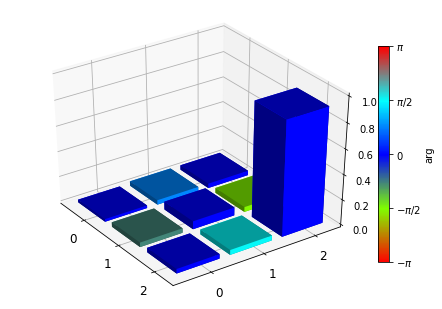

In [149]:
rhoNor = validDensityMatrix(rho.full())
matrix_histogram_complex(rhoNor)

In [144]:
Qobj(rhoNor)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 0.02137868+0.00000000e+00j  0.0247664 +2.68704579e-02j
   0.03651189-6.76457278e-04j]
 [ 0.0247664 -2.68704579e-02j  0.06468682+6.93889390e-18j
  -0.00149141-3.96628768e-02j]
 [ 0.03651189+6.76457278e-04j -0.00149141+3.96628768e-02j
   0.9139345 +0.00000000e+00j]]

In [143]:
rho

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[-0.01941497+2.45697597e-17j  0.04266693+4.52127784e-02j
   0.039503  -1.39212620e-16j]
 [ 0.04266693-4.52127784e-02j  0.0549836 +7.16299054e-17j
  -0.00224349-4.17464929e-02j]
 [ 0.039503  +1.89597604e-17j -0.00224349+4.17464929e-02j
   0.96443136-7.54736111e-17j]]